<a href="https://colab.research.google.com/github/mikael-vestri/eCommerceAnalysis/blob/main/Olist_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading datasets

In [ ]:
customers = pd.read_csv('/content/olist_customers_dataset.csv')
geolocation = pd.read_csv('/content/olist_geolocation_dataset.csv')
order_items = pd.read_csv('/content/olist_order_items_dataset.csv')
order_payments = pd.read_csv('/content/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('/content/olist_order_reviews_dataset.csv')
orders = pd.read_csv('/content/olist_orders_dataset.csv')
products = pd.read_csv('/content/olist_products_dataset.csv')
sellers = pd.read_csv('/content/olist_sellers_dataset.csv')
product_category = pd.read_csv('/content/product_category_name_translation.csv')

list_of_datasets = [customers,geolocation,order_items,order_payments,order_reviews,orders,products,sellers,product_category]
dataset_names = ['customers','geolocation','order_items','order_payments','order_reviews','orders','products','sellers','product_category']

## **Data Pre-Processing**

Let's take a look at the datasets and investigate them to check if there are duplicates or null values in it.

In [ ]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
geolocation[geolocation.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


In [ ]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
#number of duplicated rows in each dataset

for i in range(len(list_of_datasets)):
  duplicates = list_of_datasets[i].duplicated().sum()
  print(f"total duplicates in {dataset_names[i]} is: ", duplicates)

total duplicates in customers is:  0
total duplicates in geolocation is:  261831
total duplicates in order_items is:  0
total duplicates in order_payments is:  0
total duplicates in order_reviews is:  0
total duplicates in orders is:  0
total duplicates in products is:  0
total duplicates in sellers is:  0
total duplicates in product_category is:  0


In [ ]:
#check null values in all datasets and the shape of the datasets

for i in range(len(list_of_datasets)):
  print(dataset_names[i].upper())
  print(list_of_datasets[i].isnull().sum())
  print("\nshape of the dataset:")
  print(list_of_datasets[i].shape)
  print("\n\n-------------------------------------")

CUSTOMERS
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

shape of the dataset:
(99441, 5)


-------------------------------------
GEOLOCATION
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

shape of the dataset:
(1000163, 5)


-------------------------------------
ORDER_ITEMS
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

shape of the dataset:
(112650, 7)


-------------------------------------
ORDER_PAYMENTS
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

shape of the dataset:
(103886, 5)


-----------------

- in terms of duplications, only geolocations has a some duplicates, which we will remove. 
- In terms of null values, for reviews, they are not relevant for the predict model and for the EDA (in fact we'll simply not use this table). Later for the NLP analysis we'll get back to this.
- for the products and orders table, we'll just drop the null rows, since they represent a small percentage (2-to-3%) of the dataset.  

In [ ]:
#droping duplicates for geolocation
geolocation = geolocation.drop_duplicates()

#droping null values
products = products.dropna()
orders = orders.dropna()

In [ ]:
products.shape

(32340, 9)

In [ ]:
orders.shape

(96461, 8)

nice :) now let's check the data types

In [ ]:
for i in range(len(list_of_datasets)):
  print(dataset_names[i].upper())
  print(list_of_datasets[i].dtypes)
  print("\n\n-------------------------------------")

CUSTOMERS
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object


-------------------------------------
GEOLOCATION
geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object


-------------------------------------
ORDER_ITEMS
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object


-------------------------------------
ORDER_PAYMENTS
order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object


--------------------------

Now let's join the dataframes and select only relevant columns

In [ ]:
join_df = order_items.join(orders.set_index('order_id'),on='order_id',how='left') \
          .join(products.set_index('product_id'),on='product_id',how='left') \
          .join(sellers.set_index('seller_id'),on='seller_id',how='left') \
          .join(order_payments.set_index('order_id'),on='order_id',how='left') \
          .join(customers.set_index('customer_id'),on='customer_id',how='left')

In [ ]:
join_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,volta redonda,SP,1.0,credit_card,2.0,72.19,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,sao paulo,SP,1.0,credit_card,3.0,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,borda da mata,MG,1.0,credit_card,5.0,216.87,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,franca,SP,1.0,credit_card,2.0,25.78,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,loanda,PR,1.0,credit_card,3.0,218.04,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP


In [ ]:
join_df.shape

(117604, 33)

In [ ]:
join_df.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                      2583
order_status                     2583
order_purchase_timestamp         2583
order_approved_at                2583
order_delivered_carrier_date     2583
order_delivered_customer_date    2583
order_estimated_delivery_date    2583
product_category_name            1699
product_name_lenght              1699
product_description_lenght       1699
product_photos_qty               1699
product_weight_g                 1699
product_length_cm                1699
product_height_cm                1699
product_width_cm                 1699
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
payment_sequential                  3
payment_type

In [ ]:
join_df.duplicated().sum()

0

In [ ]:
#again let's drop na values
join_df = join_df.dropna()

In [ ]:
print(join_df.isna().sum())
print(join_df.dtypes)

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value       

now let's drop some columns that are not relevant to our analysis

In [ ]:
df_final = join_df.copy()

In [ ]:
#first, lets drop the IDs, we don't need them anymore
df_final = df_final.drop(['order_id','order_item_id','product_id','seller_id','customer_id','customer_unique_id'],axis=1)

In [ ]:
#also dropping zip codes (not relevant here, we just need city and states), dropping descriptions of the products, dropping some dates that are not relevant

df_final = df_final.drop(['customer_zip_code_prefix','seller_zip_code_prefix','product_name_lenght','order_approved_at'],axis=1)

In [ ]:
#let's filter just for the products that were actually delivered (there are only 7 values that are not delivered) so we can drop this column 
df_final = df_final[df_final['order_status']=='delivered']

#and lets turn the lengths of the products into volume so we can drop these columns as well.
df_final['product_volume'] = df_final['product_length_cm']*df_final['product_height_cm']*df_final['product_width_cm']
df_final = df_final.drop(['order_status','product_length_cm','product_height_cm','product_width_cm'],axis=1)

In [ ]:
df_final.shape

(113383, 20)

In [ ]:
df_final

,shipping_limit_date,price,freight_value,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_description_lenght,product_photos_qty,product_weight_g,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,customer_city,customer_state,product_volume
0,2017-09-19 09:45:35,58.90,13.29,2017-09-13 08:59:02,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,cool_stuff,598.0,4.0,650.0,volta redonda,SP,1.0,credit_card,2.0,72.19,campos dos goytacazes,RJ,3528.0
1,2017-05-03 11:05:13,239.90,19.93,2017-04-26 10:53:06,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,pet_shop,239.0,2.0,30000.0,sao paulo,SP,1.0,credit_card,3.0,259.83,santa fe do sul,SP,60000.0
2,2018-01-18 14:48:30,199.00,17.87,2018-01-14 14:33:31,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,moveis_decoracao,695.0,2.0,3050.0,borda da mata,MG,1.0,credit_card,5.0,216.87,para de minas,MG,14157.0
3,2018-08-15 10:10:18,12.99,12.79,2018-08-08 10:00:35,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,perfumaria,480.0,1.0,200.0,franca,SP,1.0,credit_card,2.0,25.78,atibaia,SP,2400.0
4,2017-02-13 13:57:51,199.90,18.14,2017-02-04 13:57:51,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,ferramentas_jardim,409.0,1.0,3750.0,loanda,PR,1.0,credit_card,3.0,218.04,varzea paulista,SP,42000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,2018-05-02 04:11:01,299.99,43.41,2018-04-23 13:57:06,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00,utilidades_domesticas,1002.0,3.0,10150.0,itajai,SC,1.0,boleto,1.0,343.40,sao luis,MA,53400.0
112646,2018-07-20 04:31:48,350.00,36.53,2018-07-14 10:26:46,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00,informatica_acessorios,232.0,1.0,8950.0,sao paulo,SP,1.0,boleto,1.0,386.53,curitiba,PR,44460.0
112647,2017-10-30 17:14:25,99.90,16.95,2017-10-23 17:07:56,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00,esporte_lazer,869.0,1.0,967.0,curitiba,PR,1.0,credit_card,3.0,116.85,sao paulo,SP,9576.0
112648,2017-08-21 00:04:32,55.99,8.72,2017-08-14 23:02:59,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00,informatica_acessorios,1306.0,1.0,100.0,sao paulo,SP,1.0,credit_card,3.0,64.71,vinhedo,SP,8000.0


Now let's just fix some data types that aren't correct

In [ ]:
df_final['shipping_limit_date'] = pd.to_datetime(df_final['shipping_limit_date']).dt.strftime('%d-%m-%Y')
df_final['order_purchase_timestamp'] = pd.to_datetime(df_final['order_purchase_timestamp']).dt.strftime('%d-%m-%Y')
df_final['order_delivered_customer_date'] = pd.to_datetime(df_final['order_delivered_customer_date']).dt.strftime('%d-%m-%Y')
df_final['order_estimated_delivery_date'] = pd.to_datetime(df_final['order_estimated_delivery_date']).dt.strftime('%d-%m-%Y')
df_final['order_delivered_carrier_date'] = pd.to_datetime(df_final['order_delivered_carrier_date']).dt.strftime('%d-%m-%Y')

In [ ]:
#converting again to timestamps since it was converted to strings previously
df_final['order_delivered_customer_date'] = pd.to_datetime(df_final['order_delivered_customer_date'],format='%d-%m-%Y')
df_final['order_purchase_timestamp'] = pd.to_datetime(df_final['order_purchase_timestamp'],format='%d-%m-%Y')
df_final['order_estimated_delivery_date'] = pd.to_datetime(df_final['order_estimated_delivery_date'],format='%d-%m-%Y')
df_final['shipping_limit_date'] = pd.to_datetime(df_final['shipping_limit_date'],format='%d-%m-%Y')
df_final['order_delivered_carrier_date'] = pd.to_datetime(df_final['order_delivered_carrier_date'],format='%d-%m-%Y')

In [ ]:
#just repositioning some columns to have a more interesting sequence
df_final = df_final[['product_category_name', 'customer_city', 'customer_state',  \
                     'seller_city', 'seller_state', 'price', 'payment_value','freight_value', 'product_photos_qty', \
                     'product_description_lenght', 'product_volume', 'product_weight_g', 'payment_sequential', 'payment_type', \
                     'payment_installments', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date', 'order_purchase_timestamp',]]

## **Exploratory Data Analysis**

Now we can start with the EDA. Let's try to answer some questions:

1.   What cities and states sold more each month? and each year? 
2.   Which category sells more?
3.   Is there any kind of sazonality?
4.   What about the freight? Does it make sense to have more sellers in a certain place?
5.   is there a type of ad that sells more? Like description length and number of photos





-----------------------------------------------
let's start checking the sales by month

In [ ]:
#for this analysis we only need the order_purchase_timestamp column, so we'll create a new dataframe with only this column for dates
df_purch = df_final.copy()
df_purch = df_purch.drop(['order_delivered_customer_date','order_estimated_delivery_date','shipping_limit_date'],axis=1)
#let's also reposition the columns

df_purch.head()

,product_category_name,customer_city,customer_state,seller_city,seller_state,price,payment_value,freight_value,product_photos_qty,product_description_lenght,product_volume,product_weight_g,payment_sequential,payment_type,payment_installments,order_delivered_carrier_date,order_purchase_timestamp
0,cool_stuff,campos dos goytacazes,RJ,volta redonda,SP,58.90,72.19,13.29,4.0,598.0,3528.0,650.0,1.0,credit_card,2.0,2017-09-19,2017-09-13
1,pet_shop,santa fe do sul,SP,sao paulo,SP,239.90,259.83,19.93,2.0,239.0,60000.0,30000.0,1.0,credit_card,3.0,2017-05-04,2017-04-26
2,moveis_decoracao,para de minas,MG,borda da mata,MG,199.00,216.87,17.87,2.0,695.0,14157.0,3050.0,1.0,credit_card,5.0,2018-01-16,2018-01-14
3,perfumaria,atibaia,SP,franca,SP,12.99,25.78,12.79,1.0,480.0,2400.0,200.0,1.0,credit_card,2.0,2018-08-10,2018-08-08
4,ferramentas_jardim,varzea paulista,SP,loanda,PR,199.90,218.04,18.14,1.0,409.0,42000.0,3750.0,1.0,credit_card,3.0,2017-02-16,2017-02-04


In [ ]:
# let's generate columns for month and year
df_purch['day'] = df_purch['order_purchase_timestamp'].dt.day
df_purch['month'] = df_purch['order_purchase_timestamp'].dt.month
df_purch['year'] = df_purch['order_purchase_timestamp'].dt.year
# also creating a month-year column because you never know....
df_purch['month_year'] = df_purch['order_purchase_timestamp'].dt.strftime('%Y-%m')

In [ ]:
df_purch.head()

,product_category_name,customer_city,customer_state,seller_city,seller_state,price,payment_value,freight_value,product_photos_qty,product_description_lenght,...,product_weight_g,payment_sequential,payment_type,payment_installments,order_delivered_carrier_date,order_purchase_timestamp,day,month,year,month_year
0,cool_stuff,campos dos goytacazes,RJ,volta redonda,SP,58.90,72.19,13.29,4.0,598.0,...,650.0,1.0,credit_card,2.0,2017-09-19,2017-09-13,13,9,2017,2017-09
1,pet_shop,santa fe do sul,SP,sao paulo,SP,239.90,259.83,19.93,2.0,239.0,...,30000.0,1.0,credit_card,3.0,2017-05-04,2017-04-26,26,4,2017,2017-04
2,moveis_decoracao,para de minas,MG,borda da mata,MG,199.00,216.87,17.87,2.0,695.0,...,3050.0,1.0,credit_card,5.0,2018-01-16,2018-01-14,14,1,2018,2018-01
3,perfumaria,atibaia,SP,franca,SP,12.99,25.78,12.79,1.0,480.0,...,200.0,1.0,credit_card,2.0,2018-08-10,2018-08-08,8,8,2018,2018-08
4,ferramentas_jardim,varzea paulista,SP,loanda,PR,199.90,218.04,18.14,1.0,409.0,...,3750.0,1.0,credit_card,3.0,2017-02-16,2017-02-04,4,2,2017,2017-02


creating some aggregations in order to plot the graphs. Sum of sales grouped by month

In [ ]:
df_sales_by_month = df_purch.groupby(['month_year']).agg(total_sales=('price','sum'))
df_sales_by_month.reset_index()

,month_year,total_sales
0,2016-10,41613.89
1,2016-12,10.90
2,2017-01,116499.95
3,2017-02,235824.38
4,2017-03,374319.44
5,2017-04,351623.76
6,2017-05,517071.04
7,2017-06,436915.78
8,2017-07,511603.82
9,2017-08,574149.64


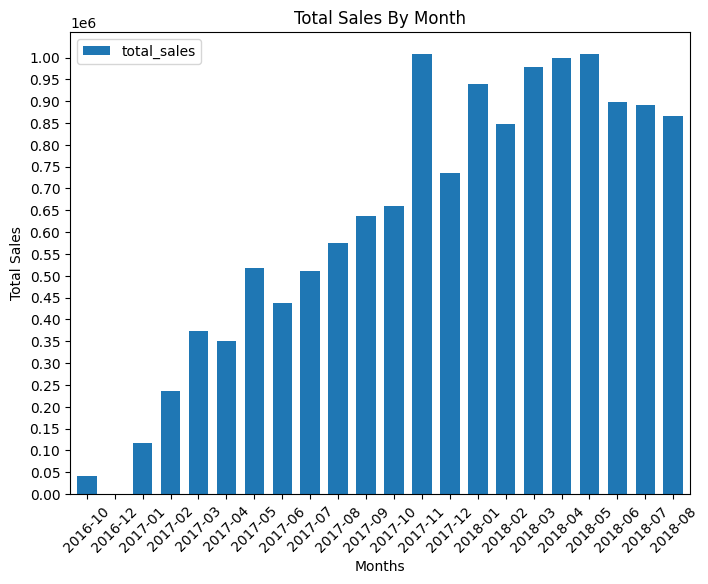

In [ ]:
ax = df_sales_by_month.plot.bar(figsize=(8, 6), width=0.7)
plt.xlabel('Months')
plt.legend()
plt.ylabel('Total Sales')
plt.title("Total Sales By Month")
plt.xticks(rotation=45)
plt.yticks(range(0, max(df_sales_by_month.total_sales.astype(int)) + 500, 50000))
plt.show()

Now checking sales by State (of customers)

*   number of sales by state
*   total revenue by state



In [ ]:
df_states = df_final.copy()
df_states = df_states.groupby('customer_state').agg(number_of_sales=('price','count'),total_revenue=('price',sum)).sort_values('number_of_sales',ascending=True)
df_states.head()

,number_of_sales,total_revenue
customer_state,,
RR,44,6811.49
AP,83,13554.81
AC,92,16940.56
AM,167,22066.56
RO,275,45926.49


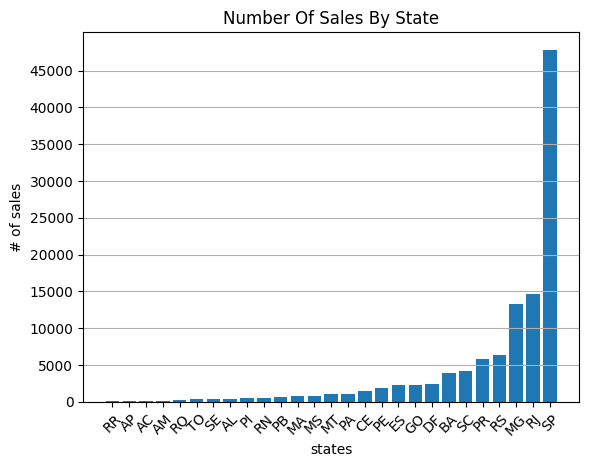

In [ ]:
x = df_states.index
y = df_states['number_of_sales']
plt.bar(x,y)
plt.title("Number Of Sales By State")
plt.xlabel("states")
plt.ylabel("# of sales")
plt.xticks(rotation=45)
plt.yticks(range(0,max(df_states['number_of_sales']),5000))
plt.grid(axis='y')
plt.show()

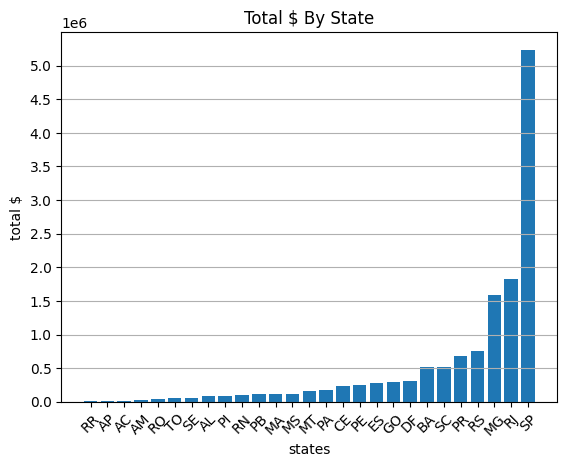

In [ ]:
x = df_states.index
y = df_states['total_revenue']
plt.bar(x,y)
plt.title("Total $ By State")
plt.xlabel("states")
plt.ylabel("total $")
plt.xticks(rotation=45)
plt.yticks(range(0,max(df_states['total_revenue'].astype(int)),500000))
plt.grid(axis='y')
plt.show()

Let's see what are the top categories that sells more

In [ ]:
df_categories = df_final.groupby('product_category_name').agg(sales=('price','sum'))
df_categories = df_categories.nlargest(10,'sales').reset_index()
df_low_categories = df_categories.nlargest(10,'sales')
df_categories


,product_category_name,sales
0,beleza_saude,1271333.29
1,relogios_presentes,1213162.80
2,cama_mesa_banho,1077834.14
3,esporte_lazer,990396.24
4,informatica_acessorios,918837.87
5,moveis_decoracao,745748.80
6,utilidades_domesticas,648187.74
7,cool_stuff,634163.78
8,automotivo,602881.75
9,ferramentas_jardim,492255.08


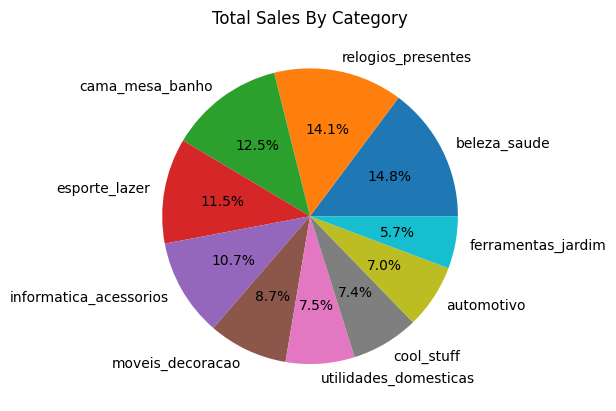

In [ ]:
labels = list(df_categories.product_category_name.values)
plt.pie(df_categories.sales,labels=labels,autopct='%1.1f%%', labeldistance=1.1)
plt.title('Total Sales By Category')
# plt.legend(loc='upper right')
plt.show()

Let's analyse the performance of the deliveries

*   how many deliveries were late?
*   how many were delayed to the carrier?



In [ ]:
df_final.head()

,product_category_name,customer_city,customer_state,seller_city,seller_state,price,payment_value,freight_value,product_photos_qty,product_description_lenght,product_volume,product_weight_g,payment_sequential,payment_type,payment_installments,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,order_purchase_timestamp
0,cool_stuff,campos dos goytacazes,RJ,volta redonda,SP,58.90,72.19,13.29,4.0,598.0,3528.0,650.0,1.0,credit_card,2.0,2017-09-19,2017-09-20,2017-09-29,2017-09-19,2017-09-13
1,pet_shop,santa fe do sul,SP,sao paulo,SP,239.90,259.83,19.93,2.0,239.0,60000.0,30000.0,1.0,credit_card,3.0,2017-05-04,2017-05-12,2017-05-15,2017-05-03,2017-04-26
2,moveis_decoracao,para de minas,MG,borda da mata,MG,199.00,216.87,17.87,2.0,695.0,14157.0,3050.0,1.0,credit_card,5.0,2018-01-16,2018-01-22,2018-02-05,2018-01-18,2018-01-14
3,perfumaria,atibaia,SP,franca,SP,12.99,25.78,12.79,1.0,480.0,2400.0,200.0,1.0,credit_card,2.0,2018-08-10,2018-08-14,2018-08-20,2018-08-15,2018-08-08
4,ferramentas_jardim,varzea paulista,SP,loanda,PR,199.90,218.04,18.14,1.0,409.0,42000.0,3750.0,1.0,credit_card,3.0,2017-02-16,2017-03-01,2017-03-17,2017-02-13,2017-02-04


In [ ]:
#let's create a new column checking if the deliver was late or in time
df_delivery = df_final.copy()
df_delivery['delay'] = (df_delivery['order_estimated_delivery_date'] - df_delivery['order_delivered_customer_date']).dt.days

In [ ]:
def status(x):
  if x >= 0:
    return "in time"
  else:
    return "delayed"

In [ ]:
df_delivery['delivery_status'] = df_delivery['delay'].apply(status)

In [ ]:
df_delivery.head(200)

,product_category_name,customer_city,customer_state,seller_city,seller_state,price,payment_value,freight_value,product_photos_qty,product_description_lenght,...,payment_sequential,payment_type,payment_installments,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,order_purchase_timestamp,delay,delivery_status
0,cool_stuff,campos dos goytacazes,RJ,volta redonda,SP,58.90,72.19,13.29,4.0,598.0,...,1.0,credit_card,2.0,2017-09-19,2017-09-20,2017-09-29,2017-09-19,2017-09-13,9,in time
1,pet_shop,santa fe do sul,SP,sao paulo,SP,239.90,259.83,19.93,2.0,239.0,...,1.0,credit_card,3.0,2017-05-04,2017-05-12,2017-05-15,2017-05-03,2017-04-26,3,in time
2,moveis_decoracao,para de minas,MG,borda da mata,MG,199.00,216.87,17.87,2.0,695.0,...,1.0,credit_card,5.0,2018-01-16,2018-01-22,2018-02-05,2018-01-18,2018-01-14,14,in time
3,perfumaria,atibaia,SP,franca,SP,12.99,25.78,12.79,1.0,480.0,...,1.0,credit_card,2.0,2018-08-10,2018-08-14,2018-08-20,2018-08-15,2018-08-08,6,in time
4,ferramentas_jardim,varzea paulista,SP,loanda,PR,199.90,218.04,18.14,1.0,409.0,...,1.0,credit_card,3.0,2017-02-16,2017-03-01,2017-03-17,2017-02-13,2017-02-04,16,in time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,perfumaria,campinas,SP,campinas,SP,259.00,269.63,10.63,1.0,805.0,...,1.0,credit_card,3.0,2017-10-23,2017-10-24,2017-11-03,2017-10-27,2017-10-23,10,in time
201,relogios_presentes,sao paulo,SP,sao paulo,SP,55.00,62.65,7.65,4.0,336.0,...,1.0,credit_card,2.0,2018-08-06,2018-08-07,2018-08-09,2018-08-06,2018-08-04,2,in time
202,esporte_lazer,brasilia,DF,ribeirao preto,SP,133.00,149.69,16.69,1.0,831.0,...,1.0,credit_card,4.0,2017-05-15,2017-05-23,2017-06-07,2017-05-19,2017-05-14,15,in time
203,informatica_acessorios,macae,RJ,belo horizonte,MG,35.90,54.13,18.23,2.0,1080.0,...,1.0,credit_card,1.0,2018-05-24,2018-06-05,2018-06-19,2018-06-01,2018-05-11,14,in time


In [ ]:
#counting the percentage of deliveries delayed
delayed = len(df_delivery[df_delivery['delivery_status']=="delayed"])/len(df_delivery['delivery_status'])*100
in_time = len(df_delivery[df_delivery['delivery_status']=="in time"])/len(df_delivery['delivery_status'])*100

In [ ]:
in_time

93.46727463552737

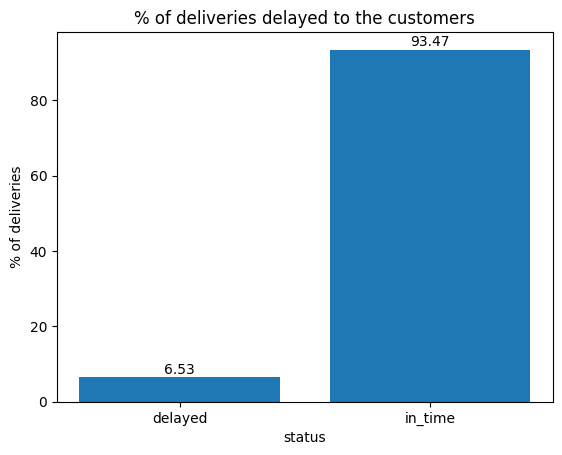

In [ ]:
x = ['delayed','in_time']
y = [delayed,in_time]
plt.bar(x,y)
plt.title("% of deliveries delayed to the customers")
for i, v in enumerate(y):
    plt.text(i, v+1, '{:.2f}'.format(v), ha='center')
plt.xlabel("status")
plt.ylabel("% of deliveries")
plt.show()

As we can see, we've got an expressive number of delays in the deliveries, this might be affecting the company's reputation (which we'll analyze later with the NLP and the reviews)

Let's just check if these delays are with the logistic partner or it is with the seller (analyzing wheter the time for the seller send to the logistic partner was delayed or not)

In [ ]:
df_delivery['seller_delay'] = (df_delivery['shipping_limit_date'] - df_delivery['order_delivered_carrier_date']).dt.days

In [ ]:
df_delivery

,product_category_name,customer_city,customer_state,seller_city,seller_state,price,payment_value,freight_value,product_photos_qty,product_description_lenght,...,payment_type,payment_installments,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,order_purchase_timestamp,delay,delivery_status,seller_delay
0,cool_stuff,campos dos goytacazes,RJ,volta redonda,SP,58.90,72.19,13.29,4.0,598.0,...,credit_card,2.0,2017-09-19,2017-09-20,2017-09-29,2017-09-19,2017-09-13,9,in time,0
1,pet_shop,santa fe do sul,SP,sao paulo,SP,239.90,259.83,19.93,2.0,239.0,...,credit_card,3.0,2017-05-04,2017-05-12,2017-05-15,2017-05-03,2017-04-26,3,in time,-1
2,moveis_decoracao,para de minas,MG,borda da mata,MG,199.00,216.87,17.87,2.0,695.0,...,credit_card,5.0,2018-01-16,2018-01-22,2018-02-05,2018-01-18,2018-01-14,14,in time,2
3,perfumaria,atibaia,SP,franca,SP,12.99,25.78,12.79,1.0,480.0,...,credit_card,2.0,2018-08-10,2018-08-14,2018-08-20,2018-08-15,2018-08-08,6,in time,5
4,ferramentas_jardim,varzea paulista,SP,loanda,PR,199.90,218.04,18.14,1.0,409.0,...,credit_card,3.0,2017-02-16,2017-03-01,2017-03-17,2017-02-13,2017-02-04,16,in time,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,utilidades_domesticas,sao luis,MA,itajai,SC,299.99,343.40,43.41,3.0,1002.0,...,boleto,1.0,2018-04-25,2018-05-10,2018-05-18,2018-05-02,2018-04-23,8,in time,7
112646,informatica_acessorios,curitiba,PR,sao paulo,SP,350.00,386.53,36.53,1.0,232.0,...,boleto,1.0,2018-07-17,2018-07-23,2018-08-01,2018-07-20,2018-07-14,9,in time,3
112647,esporte_lazer,sao paulo,SP,curitiba,PR,99.90,116.85,16.95,1.0,869.0,...,credit_card,3.0,2017-10-26,2017-10-28,2017-11-10,2017-10-30,2017-10-23,13,in time,4
112648,informatica_acessorios,vinhedo,SP,sao paulo,SP,55.99,64.71,8.72,1.0,1306.0,...,credit_card,3.0,2017-08-15,2017-08-16,2017-08-25,2017-08-21,2017-08-14,9,in time,6


In [ ]:
df_delivery['handled_to_carrier_status'] = df_delivery['seller_delay'].apply(status)

In [ ]:
#counting the percentage of deliveries delayed
delayed_carrier = len(df_delivery[df_delivery['handled_to_carrier_status']=="delayed"])/len(df_delivery['handled_to_carrier_status'])*100
in_time_carrier = len(df_delivery[df_delivery['handled_to_carrier_status']=="in time"])/len(df_delivery['handled_to_carrier_status'])*100

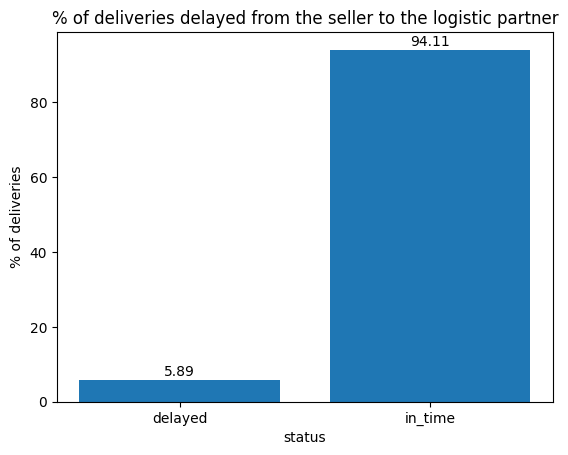

In [ ]:
x = ['delayed','in_time']
y = [delayed_carrier,in_time_carrier]
plt.bar(x,y)
plt.title("% of deliveries delayed from the seller to the logistic partner")
for i, v in enumerate(y):
    plt.text(i, v+1, '{:.2f}'.format(v), ha='center')
plt.xlabel("status")
plt.ylabel("% of deliveries")
plt.show()

Indeed we have a significant lower percentage of delayed orders handled to the logistic partner, which indicates de delays are coming from the carriers themselves. 

Now let's analyze if the freight is influenced by the size and weight of the products. 

In [ ]:
df_final.dtypes

product_category_name                    object
customer_city                            object
customer_state                           object
seller_city                              object
seller_state                             object
price                                   float64
payment_value                           float64
freight_value                           float64
product_photos_qty                      float64
product_description_lenght              float64
product_volume                          float64
product_weight_g                        float64
payment_sequential                      float64
payment_type                             object
payment_installments                    float64
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
shipping_limit_date              datetime64[ns]
order_purchase_timestamp         datetime64[ns]
dtype: object

<Axes: >

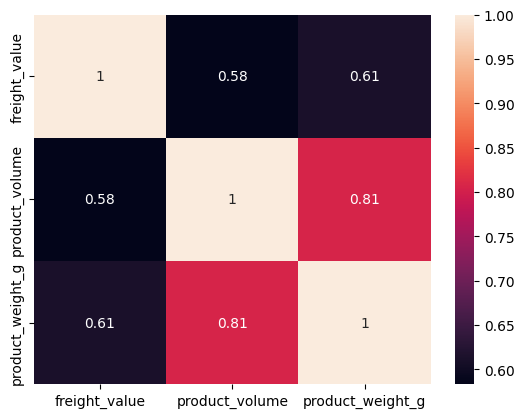

In [ ]:
df = df_final[['freight_value','product_volume','product_weight_g']]
sns.heatmap(df.corr(),annot=True)

Of course we can see a strong correlation between volume and weight, but not such a strong correlation with these attributes and the freight, so let's check the freight by state

In [ ]:
df_freight = df_final.copy()
df_freight = df_freight.groupby('customer_state').freight_value.mean().sort_values().reset_index()
df_freight

,customer_state,freight_value
0,SP,15.193162
1,PR,20.566826
2,MG,20.666101
3,RJ,21.116450
4,DF,21.165098
5,SC,21.515462
6,RS,21.700025
7,ES,22.000642
8,GO,22.613821
9,MS,23.478136


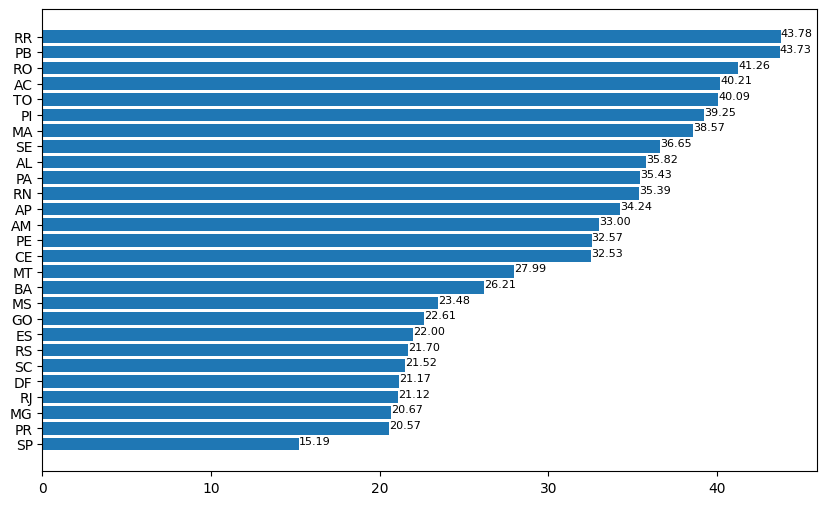

In [ ]:
x = df_freight.customer_state
y = df_freight.freight_value
plt.figure(figsize=[10,6])
plt.barh(x,y)
for i, v in enumerate(y):
    plt.text(v, i, '{:.2f}'.format(v),fontsize=8)
plt.show()

We can see that the farther away from SP, the higher it get's the freight value. Let's take a look at the Brazil's map to confirm and see the distance from SP affecting the freight value


In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install geobr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd

In [ ]:
import geobr
brazil_map = geobr.read_state()
brazil_map.to_file('brazil-states.geojson', driver='GeoJSON')

/usr/local/lib/python3.9/dist-packages/geopandas/io/file.py:174: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [ ]:
pip install descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
brazil_map = gpd.read_file('brazil-states.geojson')

<Axes: >

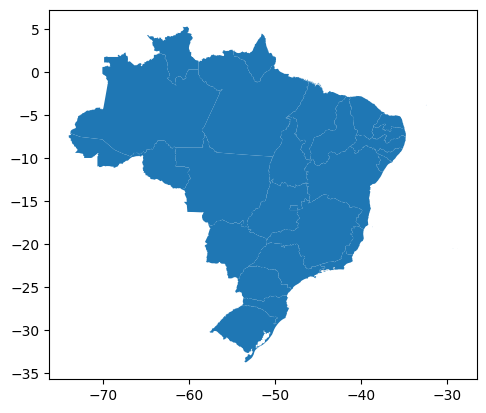

In [ ]:
brazil_map.plot()

In [ ]:
df_freight['abbrev_state'] = df_freight['customer_state']
df_freight_map = df_freight[['abbrev_state','freight_value']] 
df_freight_map.head()

,abbrev_state,freight_value
0,SP,15.193162
1,PR,20.566826
2,MG,20.666101
3,RJ,21.116450
4,DF,21.165098


In [ ]:
brazil_map.dtypes

code_state       float64
abbrev_state      object
name_state        object
code_region      float64
name_region       object
geometry        geometry
dtype: object

In [ ]:
#now we have Brazil's map, let's merge with the freight values
brazil_map = brazil_map.merge(df_freight_map,on='abbrev_state')

In [ ]:
brazil_map

,code_state,abbrev_state,name_state,code_region,name_region,geometry,freight_value
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...",41.264473
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ...",40.209022
2,13.0,AM,Amazonas,1.0,Norte,"MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2...",32.996527
3,14.0,RR,Roraima,1.0,Norte,"MULTIPOLYGON (((-60.20051 5.26434, -60.19273 5...",43.777500
4,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2...",35.432269
5,16.0,AP,Amapá,1.0,Norte,"MULTIPOLYGON (((-51.17970 4.00008, -51.17739 3...",34.236024
6,17.0,TO,Tocantins,1.0,Norte,"MULTIPOLYGON (((-48.35878 -5.17008, -48.33846 ...",40.092485
7,21.0,MA,Maranhão,2.0,Nordeste,"MULTIPOLYGON (((-45.84073 -1.04548, -45.84099 ...",38.572970
8,22.0,PI,Piauí,2.0,Nordeste,"MULTIPOLYGON (((-41.74605 -2.80350, -41.73488 ...",39.248883
9,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-41.16703 -4.46736, -41.17757 ...",32.529163


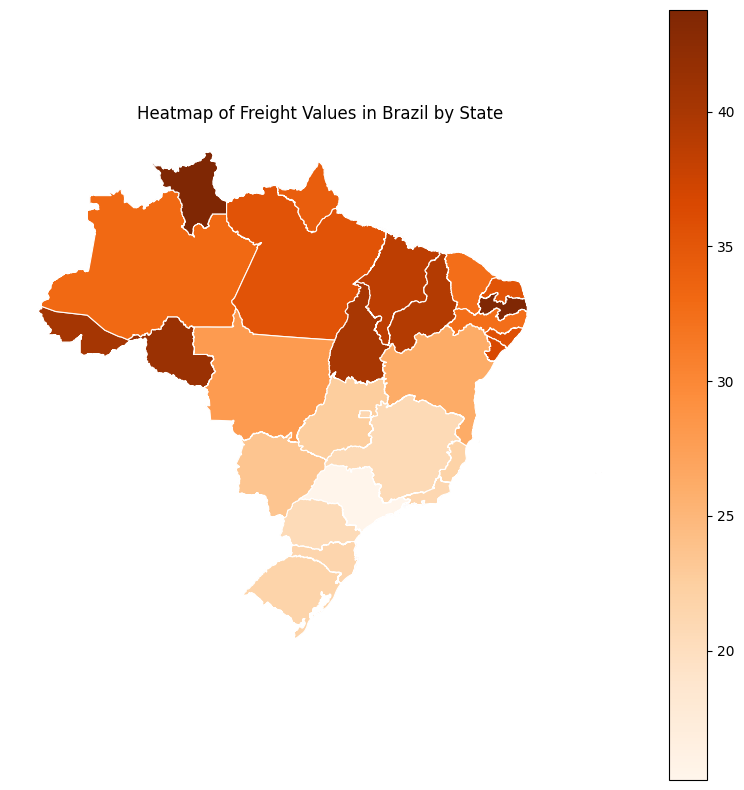

In [ ]:
# Plot the Brazil map
fig, ax = plt.subplots(figsize=(10, 10))
brazil_map.plot(ax=ax, color='lightgray', edgecolor='white')

# Plot the heatmap on top of the Brazil map
brazil_map.plot(column=brazil_map.freight_value, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='white', legend=True)

# Set the title and remove the axis
ax.set_title('Heatmap of Freight Values in Brazil by State')
ax.axis('off')

# Show the plot
plt.show()

Now let's analyze if there's a certain type of ad that sells more

Let's start analyzing if there is correlation between the number of sold items with number of pictures in the ad and the length of the description

In [ ]:
df_final.head()

,product_category_name,customer_city,customer_state,seller_city,seller_state,price,payment_value,freight_value,product_photos_qty,product_description_lenght,product_volume,product_weight_g,payment_sequential,payment_type,payment_installments,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,order_purchase_timestamp
0,cool_stuff,campos dos goytacazes,RJ,volta redonda,SP,58.90,72.19,13.29,4.0,598.0,3528.0,650.0,1.0,credit_card,2.0,2017-09-19,2017-09-20,2017-09-29,2017-09-19,2017-09-13
1,pet_shop,santa fe do sul,SP,sao paulo,SP,239.90,259.83,19.93,2.0,239.0,60000.0,30000.0,1.0,credit_card,3.0,2017-05-04,2017-05-12,2017-05-15,2017-05-03,2017-04-26
2,moveis_decoracao,para de minas,MG,borda da mata,MG,199.00,216.87,17.87,2.0,695.0,14157.0,3050.0,1.0,credit_card,5.0,2018-01-16,2018-01-22,2018-02-05,2018-01-18,2018-01-14
3,perfumaria,atibaia,SP,franca,SP,12.99,25.78,12.79,1.0,480.0,2400.0,200.0,1.0,credit_card,2.0,2018-08-10,2018-08-14,2018-08-20,2018-08-15,2018-08-08
4,ferramentas_jardim,varzea paulista,SP,loanda,PR,199.90,218.04,18.14,1.0,409.0,42000.0,3750.0,1.0,credit_card,3.0,2017-02-16,2017-03-01,2017-03-17,2017-02-13,2017-02-04


In [ ]:
df_photos = df_final.groupby('product_photos_qty').agg(sales_count_photo=('order_purchase_timestamp','count')).reset_index()
df_photos

,product_photos_qty,sales_count_photo
0,1.0,57223
1,2.0,22397
2,3.0,12658
3,4.0,8630
4,5.0,5481
5,6.0,3859
6,7.0,1525
7,8.0,758
8,9.0,309
9,10.0,347


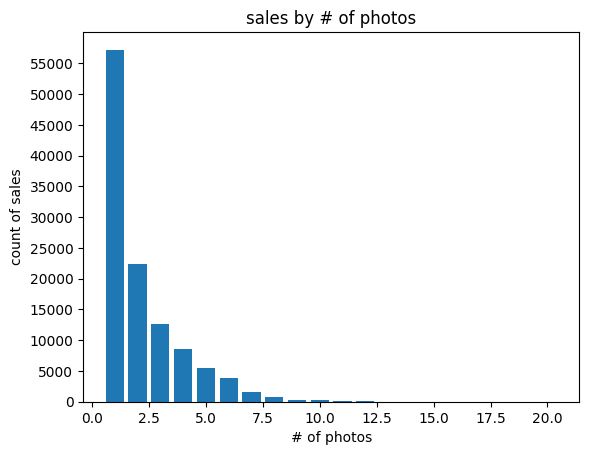

In [ ]:
x=df_photos.product_photos_qty
y=df_photos.sales_count_photo
plt.bar(x,y)
plt.title("sales by # of photos")
plt.xlabel("# of photos")
plt.ylabel("count of sales")
plt.xticks(rotation=0)
plt.yticks(range(0,max(df_photos.sales_count_photo),5000))
plt.show()

In [ ]:
df_ads = df_final.groupby('product_description_lenght').agg(sales_count_ad=('order_purchase_timestamp','count'))
df_ads

,sales_count_ad
product_description_lenght,
4.0,6
8.0,2
15.0,1
20.0,7
23.0,1
...,...
3963.0,1
3976.0,5
3985.0,3


<ipython-input-144-f7026e08c498>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_final.product_description_lenght)


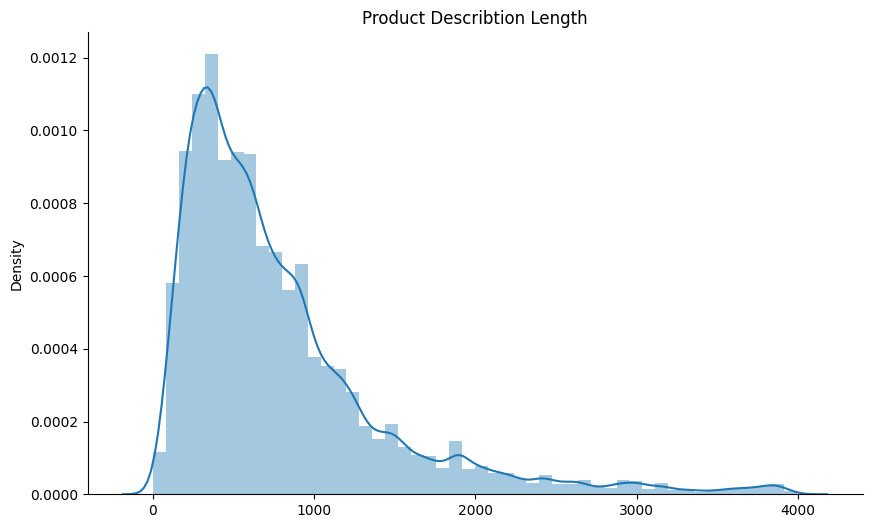

In [ ]:
plt.figure(figsize=[10, 6])
sns.distplot(x = df_final.product_description_lenght)
plt.title('Product Describtion Length')
sns.despine()

<Axes: >

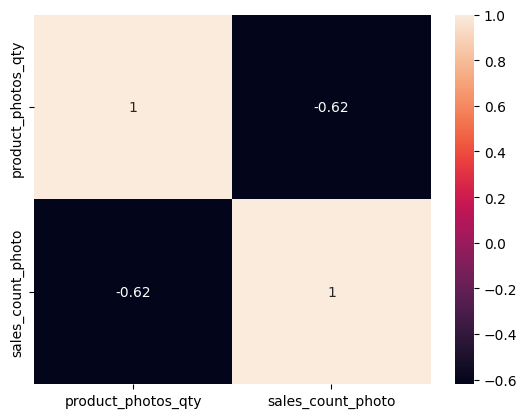

In [ ]:
#analyzing the correlation 
df = df_photos
sns.heatmap(df.corr(),annot=True)

# Predictions and Classifications

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.5 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

# Sales Forecast

Let's try to analyze the sales through time to try to do a demand forecast with time-series.

We might want to analyze the sales per week so we'll first adjust the dataframe generating this new column

In [ ]:
df_purch['week_no'] = df_purch['order_purchase_timestamp'].dt.strftime('%U-%Y')
df_purch['date'] = pd.to_datetime(df_purch['week_no'] + '-0', format='%U-%Y-%w')
df_purch

,product_category_name,customer_city,customer_state,seller_city,seller_state,price,payment_value,freight_value,product_photos_qty,product_description_lenght,...,payment_type,payment_installments,order_delivered_carrier_date,order_purchase_timestamp,day,month,year,month_year,week_no,date
0,cool_stuff,campos dos goytacazes,RJ,volta redonda,SP,58.90,72.19,13.29,4.0,598.0,...,credit_card,2.0,2017-09-19,2017-09-13,13,9,2017,2017-09,37-2017,2017-09-10
1,pet_shop,santa fe do sul,SP,sao paulo,SP,239.90,259.83,19.93,2.0,239.0,...,credit_card,3.0,2017-05-04,2017-04-26,26,4,2017,2017-04,17-2017,2017-04-23
2,moveis_decoracao,para de minas,MG,borda da mata,MG,199.00,216.87,17.87,2.0,695.0,...,credit_card,5.0,2018-01-16,2018-01-14,14,1,2018,2018-01,02-2018,2018-01-14
3,perfumaria,atibaia,SP,franca,SP,12.99,25.78,12.79,1.0,480.0,...,credit_card,2.0,2018-08-10,2018-08-08,8,8,2018,2018-08,31-2018,2018-08-05
4,ferramentas_jardim,varzea paulista,SP,loanda,PR,199.90,218.04,18.14,1.0,409.0,...,credit_card,3.0,2017-02-16,2017-02-04,4,2,2017,2017-02,05-2017,2017-01-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,utilidades_domesticas,sao luis,MA,itajai,SC,299.99,343.40,43.41,3.0,1002.0,...,boleto,1.0,2018-04-25,2018-04-23,23,4,2018,2018-04,16-2018,2018-04-22
112646,informatica_acessorios,curitiba,PR,sao paulo,SP,350.00,386.53,36.53,1.0,232.0,...,boleto,1.0,2018-07-17,2018-07-14,14,7,2018,2018-07,27-2018,2018-07-08
112647,esporte_lazer,sao paulo,SP,curitiba,PR,99.90,116.85,16.95,1.0,869.0,...,credit_card,3.0,2017-10-26,2017-10-23,23,10,2017,2017-10,43-2017,2017-10-22
112648,informatica_acessorios,vinhedo,SP,sao paulo,SP,55.99,64.71,8.72,1.0,1306.0,...,credit_card,3.0,2017-08-15,2017-08-14,14,8,2017,2017-08,33-2017,2017-08-13


Let's see the sales by day first

In [ ]:
df_sales = df_purch.groupby('order_purchase_timestamp').price.count().rename('sales_by_day').reset_index()
df_sales = df_sales.rename(columns={'order_purchase_timestamp':'day'})
df_sales.head()

,day,sales_by_day
0,2016-10-03,7
1,2016-10-04,69
2,2016-10-05,51
3,2016-10-06,47
4,2016-10-07,45


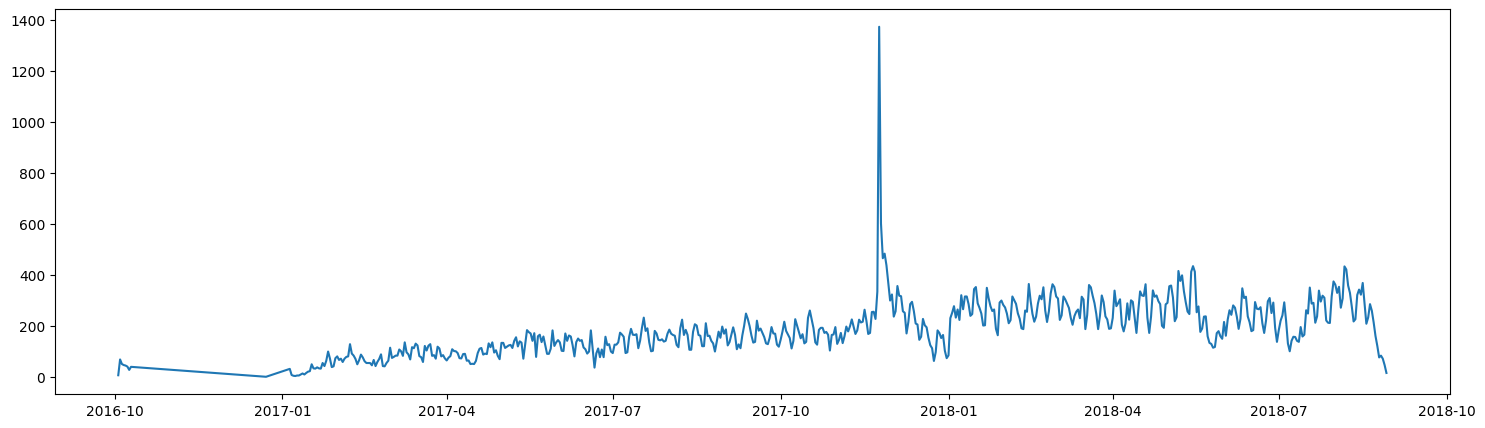

In [ ]:
plt.figure(figsize=[18,5])
plt.plot(df_sales.day,df_sales.sales_by_day)
plt.show()

now let's see sales by week

In [ ]:
# df_weekly = df_purch.groupby(['year','week_no']).price.count().rename('weekly_sales').reset_index()
df_weekly = df_purch.groupby(['date']).price.count().rename('weekly_sales').reset_index()
df_weekly

,date,weekly_sales
0,2016-10-02,260
1,2016-10-09,68
2,2016-12-18,1
3,2017-01-01,45
4,2017-01-08,66
...,...,...
85,2018-07-29,2222
86,2018-08-05,2348
87,2018-08-12,2084
88,2018-08-19,1354


In [ ]:
# df_weekly['year_week'] = df_weekly['year'].astype(str).str.cat(df_weekly['week_no'].astype(str))
# df_weekly.head(20)

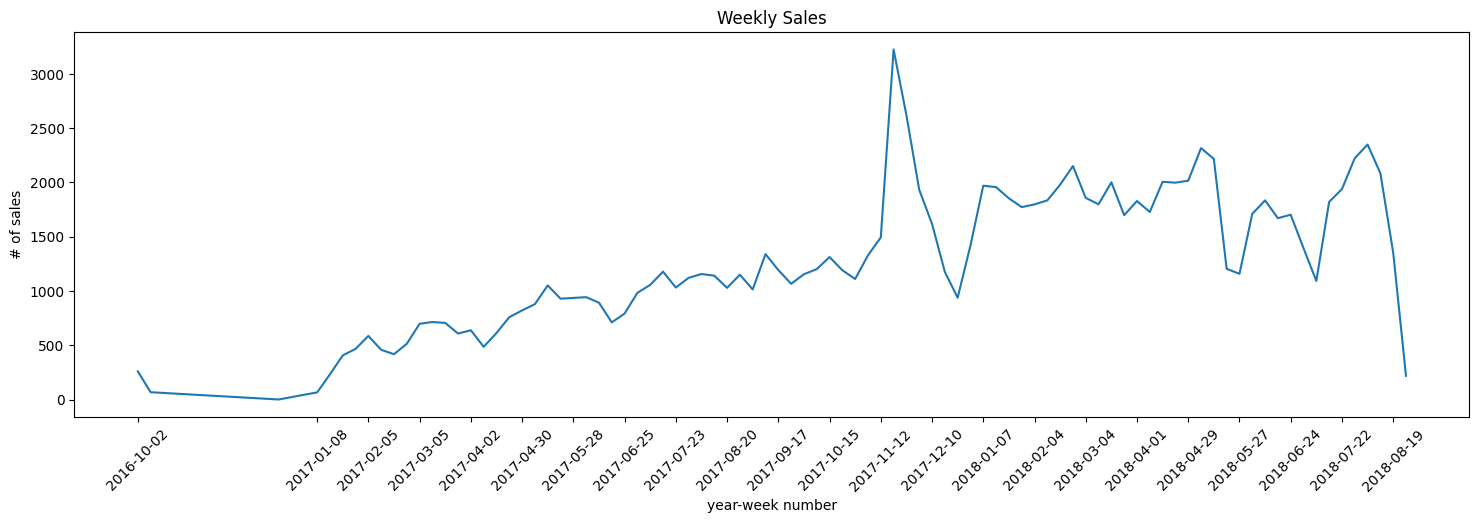

In [ ]:
plt.figure(figsize=[18,5])
plt.plot(df_weekly.date,df_weekly.weekly_sales)
plt.title('Weekly Sales')
plt.xlabel('year-week number')
plt.ylabel('# of sales')
plt.xticks(df_weekly.date[::4],rotation=45)
plt.show()

Let's do the same thing, but checking the total revenue over time instead of the number of sales

In [ ]:
df_weekly = df_purch.groupby(['date']).price.sum().rename('weekly_revenue').reset_index()
df_weekly

,date,weekly_revenue
0,2016-10-02,35926.83
1,2016-10-09,5687.06
2,2016-12-18,10.90
3,2017-01-01,5209.18
4,2017-01-08,9219.87
...,...,...
85,2018-07-29,274735.77
86,2018-08-05,282355.71
87,2018-08-12,257928.55
88,2018-08-19,145300.82


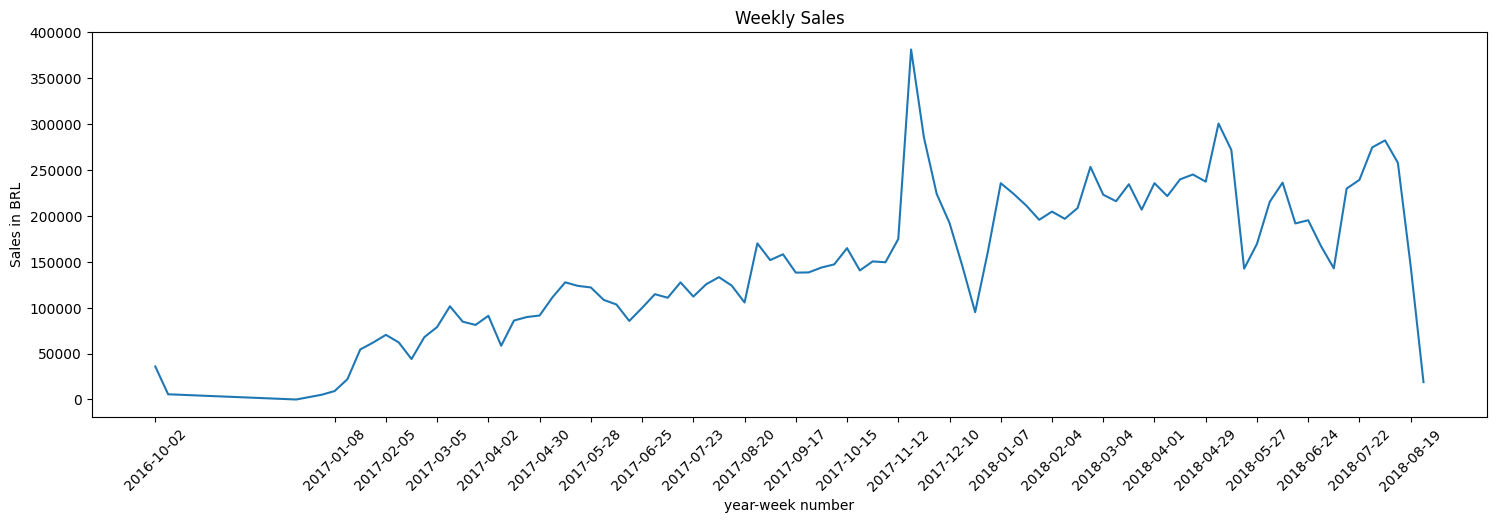

In [ ]:
plt.figure(figsize=[18,5])
plt.plot(df_weekly.date,df_weekly.weekly_revenue)
plt.title('Weekly Sales')
plt.xlabel('year-week number')
plt.ylabel('Sales in BRL')
plt.xticks(df_weekly.date[::4],rotation=45)
plt.show()

Nice, now we create a training and test set to try to develop our model

In [ ]:
# ts_df = df_weekly[['date','weekly_sales']]
ts_df = df_purch[['order_purchase_timestamp','price']]
train_size = 0.8
# train_index = int(train_size*len(df_weekly))
train_index = int(train_size*len(df_weekly))
train_df = ts_df.iloc[:train_index]
test_df = ts_df.iloc[train_index:]

In [ ]:
print(train_df.dtypes)
print(test_df.dtypes)
print(ts_df.dtypes)

order_purchase_timestamp    datetime64[ns]
price                              float64
dtype: object
order_purchase_timestamp    datetime64[ns]
price                              float64
dtype: object
order_purchase_timestamp    datetime64[ns]
price                              float64
dtype: object


In [ ]:
# train_df['year_week'] = pd.to_datetime(train_df)

In [ ]:
train_df = train_df.set_index('order_purchase_timestamp')
test_df = test_df.set_index('order_purchase_timestamp')

In [ ]:
train_df

,price
order_purchase_timestamp,
2017-09-13,58.90
2017-04-26,239.90
2018-01-14,199.00
2018-08-08,12.99
2017-02-04,199.90
...,...
2018-02-13,44.90
2018-07-23,37.99
2018-08-15,29.99


In [ ]:
arima_model = sm.tsa.ARIMA(train_df['price'],order=(1,1,1)).fit()

In [ ]:
predictions = arima_model.predict(dynamic=True)
print(predictions)

In [ ]:
model = auto_arima(y=train_df['price'],exogenous=train_df.order_purchase_timestamp,trace=True)

In [ ]:
model.fit(train_df['price'])

In [ ]:
forecast=model.predict(n_periods=len(test_df),exogenous=test_df.index)

In [ ]:
test_df['forecast_ARIMA'] = forecast 

In [ ]:
test_df[['price','forecast_ARIMA']].plot()

### Other Predictions


In [ ]:
df_final.head()

,product_category_name,customer_city,customer_state,seller_city,seller_state,price,payment_value,freight_value,product_photos_qty,product_description_lenght,product_volume,product_weight_g,payment_sequential,payment_type,payment_installments,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,order_purchase_timestamp
0,cool_stuff,campos dos goytacazes,RJ,volta redonda,SP,58.90,72.19,13.29,4.0,598.0,3528.0,650.0,1.0,credit_card,2.0,2017-09-19,2017-09-20,2017-09-29,2017-09-19,2017-09-13
1,pet_shop,santa fe do sul,SP,sao paulo,SP,239.90,259.83,19.93,2.0,239.0,60000.0,30000.0,1.0,credit_card,3.0,2017-05-04,2017-05-12,2017-05-15,2017-05-03,2017-04-26
2,moveis_decoracao,para de minas,MG,borda da mata,MG,199.00,216.87,17.87,2.0,695.0,14157.0,3050.0,1.0,credit_card,5.0,2018-01-16,2018-01-22,2018-02-05,2018-01-18,2018-01-14
3,perfumaria,atibaia,SP,franca,SP,12.99,25.78,12.79,1.0,480.0,2400.0,200.0,1.0,credit_card,2.0,2018-08-10,2018-08-14,2018-08-20,2018-08-15,2018-08-08
4,ferramentas_jardim,varzea paulista,SP,loanda,PR,199.90,218.04,18.14,1.0,409.0,42000.0,3750.0,1.0,credit_card,3.0,2017-02-16,2017-03-01,2017-03-17,2017-02-13,2017-02-04


In [ ]:
df_final.columns

Index(['product_category_name', 'customer_city', 'customer_state',
       'seller_city', 'seller_state', 'price', 'payment_value',
       'freight_value', 'product_photos_qty', 'product_description_lenght',
       'product_volume', 'product_weight_g', 'payment_sequential',
       'payment_type', 'payment_installments', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'shipping_limit_date', 'order_purchase_timestamp'],
      dtype='object')

Some predictiosn we can make:

-predict if the order will be delayed (classification)

*   If we can know forehanded if a delivery will be delayed, we can pay special attention to this delivery and try to avoid this, thus, raising the score of the evaluations 



-predict the total cost of a product(?)

*   If we have a nice price predictor, we can have a nice revenue forecast and take actions to try to increase this revenue if is a company's need.



-predict the satisfaction of the customer

*   If we can understand how the satisfaction of a customer will be affected, we can try to avoid the number of unsatisfied customers and thus, avoid loosing them.



-even if a customer didn't write a review, can we predict or understand whether they are happy or mad?


<ipython-input-165-ad32bcd97edb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_final.corr(),cmap="YlGnBu")


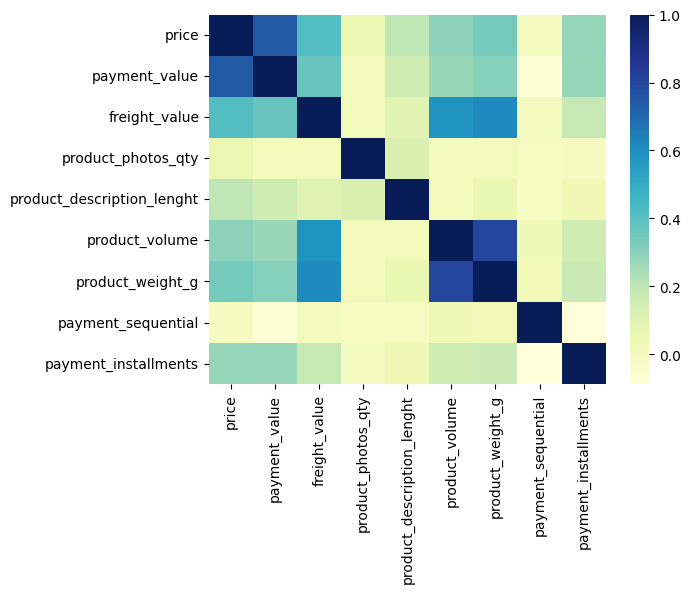

In [ ]:
# Just putting the correlation matrix here to check what features are redundant:
sns.heatmap(df_final.corr(),cmap="YlGnBu")
plt.show()

**Predicting Delivery Time**


In [ ]:
#let's bring back the df_delivery, we'll use it to predict the status of delivery
df_delivery2 = df_delivery.copy()
df_delivery2

,product_category_name,customer_city,customer_state,seller_city,seller_state,price,payment_value,freight_value,product_photos_qty,product_description_lenght,...,payment_installments,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,order_purchase_timestamp,delay,delivery_status,seller_delay,handled_to_carrier_status
0,cool_stuff,campos dos goytacazes,RJ,volta redonda,SP,58.90,72.19,13.29,4.0,598.0,...,2.0,2017-09-19,2017-09-20,2017-09-29,2017-09-19,2017-09-13,9,in time,0,in time
1,pet_shop,santa fe do sul,SP,sao paulo,SP,239.90,259.83,19.93,2.0,239.0,...,3.0,2017-05-04,2017-05-12,2017-05-15,2017-05-03,2017-04-26,3,in time,-1,delayed
2,moveis_decoracao,para de minas,MG,borda da mata,MG,199.00,216.87,17.87,2.0,695.0,...,5.0,2018-01-16,2018-01-22,2018-02-05,2018-01-18,2018-01-14,14,in time,2,in time
3,perfumaria,atibaia,SP,franca,SP,12.99,25.78,12.79,1.0,480.0,...,2.0,2018-08-10,2018-08-14,2018-08-20,2018-08-15,2018-08-08,6,in time,5,in time
4,ferramentas_jardim,varzea paulista,SP,loanda,PR,199.90,218.04,18.14,1.0,409.0,...,3.0,2017-02-16,2017-03-01,2017-03-17,2017-02-13,2017-02-04,16,in time,-3,delayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,utilidades_domesticas,sao luis,MA,itajai,SC,299.99,343.40,43.41,3.0,1002.0,...,1.0,2018-04-25,2018-05-10,2018-05-18,2018-05-02,2018-04-23,8,in time,7,in time
112646,informatica_acessorios,curitiba,PR,sao paulo,SP,350.00,386.53,36.53,1.0,232.0,...,1.0,2018-07-17,2018-07-23,2018-08-01,2018-07-20,2018-07-14,9,in time,3,in time
112647,esporte_lazer,sao paulo,SP,curitiba,PR,99.90,116.85,16.95,1.0,869.0,...,3.0,2017-10-26,2017-10-28,2017-11-10,2017-10-30,2017-10-23,13,in time,4,in time
112648,informatica_acessorios,vinhedo,SP,sao paulo,SP,55.99,64.71,8.72,1.0,1306.0,...,3.0,2017-08-15,2017-08-16,2017-08-25,2017-08-21,2017-08-14,9,in time,6,in time


In [ ]:
print(df_delivery2[df_delivery2['status_binary']==0].count())
print(df_delivery2[df_delivery2['status_binary']==1].count())

product_category_name            7407
customer_city                    7407
customer_state                   7407
seller_city                      7407
seller_state                     7407
price                            7407
payment_value                    7407
freight_value                    7407
product_photos_qty               7407
product_description_lenght       7407
product_volume                   7407
product_weight_g                 7407
payment_sequential               7407
payment_type                     7407
payment_installments             7407
order_delivered_carrier_date     7407
order_delivered_customer_date    7407
order_estimated_delivery_date    7407
shipping_limit_date              7407
order_purchase_timestamp         7407
delay                            7407
seller_delay                     7407
status_binary                    7407
status_binary_carrier            7407
dtype: int64
product_category_name            105976
customer_city                    10

This could indicate that our target column is unbalanced, we'll need to undersample our number of 1's later to apply ML models in it.

In [ ]:
df_delivery2.shape

(113383, 24)

In [ ]:
#first, we need to change the column "delivery_status" to 0 or 1 so we can use in the ML model
def convert_status(x):
  if x == "in time":
    return 1
  else:
    return 0
df_delivery2['status_binary'] = df_delivery2['delivery_status'].apply(convert_status)
df_delivery2['status_binary_carrier'] = df_delivery2['handled_to_carrier_status'].apply(convert_status)
df_delivery2 = df_delivery2.drop('handled_to_carrier_status',axis=1).drop('delivery_status',axis=1)

In [ ]:
df_delivery2.dtypes

product_category_name                    object
customer_city                            object
customer_state                           object
seller_city                              object
seller_state                             object
price                                   float64
payment_value                           float64
freight_value                           float64
product_photos_qty                      float64
product_description_lenght              float64
product_volume                          float64
product_weight_g                        float64
payment_sequential                      float64
payment_type                             object
payment_installments                    float64
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
shipping_limit_date              datetime64[ns]
order_purchase_timestamp         datetime64[ns]
delay                                   

We'll need to handle the non-numerical features. We'll use one hot encoding or drop columns or any other actions to deal with them

In [ ]:
#drop the date columns and cities, we won't need them
df_dlv_class = df_delivery2.copy() 
df_dlv_class = df_dlv_class.drop('order_delivered_carrier_date',axis=1) \
                           .drop('order_delivered_customer_date',axis=1) \
                           .drop('order_estimated_delivery_date',axis=1) \
                           .drop('shipping_limit_date',axis=1) \
                           .drop('order_purchase_timestamp',axis=1) \
                           .drop('customer_city',axis=1) \
                           .drop('seller_city',axis=1) \
                           .drop('payment_type',axis=1) \
                           .drop('product_category_name',axis=1) \
                           .drop('status_binary_carrier',axis=1)

In [ ]:
df_dlv_class.head()

,customer_state,seller_state,price,payment_value,freight_value,product_photos_qty,product_description_lenght,product_volume,product_weight_g,payment_sequential,payment_installments,delay,seller_delay,status_binary
0,RJ,SP,58.90,72.19,13.29,4.0,598.0,3528.0,650.0,1.0,2.0,9,0,1
1,SP,SP,239.90,259.83,19.93,2.0,239.0,60000.0,30000.0,1.0,3.0,3,-1,1
2,MG,MG,199.00,216.87,17.87,2.0,695.0,14157.0,3050.0,1.0,5.0,14,2,1
3,SP,SP,12.99,25.78,12.79,1.0,480.0,2400.0,200.0,1.0,2.0,6,5,1
4,SP,PR,199.90,218.04,18.14,1.0,409.0,42000.0,3750.0,1.0,3.0,16,-3,1


In [ ]:
x = df_dlv_class.iloc[:,:-1].values
y = df_dlv_class.iloc[:,-1].values

In [ ]:
print(x.shape)

(14814, 60)


In [ ]:
print(y.shape)

(14814,)


Now, before moving on with the ML models, let's undersample our dataset to have a more balanced target value.

In [ ]:
#We might have an unbalanced target column in order to apply ML models in it, so we'll need to undersample our number of 1s
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Create the oversampler
smote = SMOTE(random_state=42)

rus = RandomUnderSampler(random_state=42)
x, y = rus.fit_resample(x, y)
x, y = smote.fit_resample(x, y)

In [ ]:
#now applying one hot encoding to deal with the category features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse=False),[0,1])],remainder='passthrough')
x = np.array(ct.fit_transform(x))
# x = ct.fit_transform(x.toarray())

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
print(x[0,-11:])

[ 21.99  33.84  11.85   4.   540.   816.   300.     1.     3.    -2.
   5.  ]


In [ ]:
#selecting the features for the dataset
#Mika do futuro, você precisa talvez voltar algumas etapas para selecionar a sua variável alvo e o seu feature dataset pra chegar aqui e poder fazer o train test split (verifique se o train test split é antes ou depois)
#Mika do passado, aparentemente consegui. Separei em x e y antes com o iloc, e depois apliquei o encoder só no x pq no y já estava binario. realmente o train test split é depois do encoder (MAS CUIDADO A DUVIDA ERA SE APLICAVA ANTES OU DEPOIS DA ESCALA E É ANTES, depois faz a escala)

#mika do futuro, essa é uma etapa que visava tentar reduzir a dimensão do seu modelo selecionando as principais features. No momento não precisa, mas depois vale verificar isso.

# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# selector = SelectKBest(score_func=chi2, k=5)
# X_new = selector.fit_transform(x, y)
print(y.dtype)

int64


Before going to the ML models, let's divide the dataset into training and test's datasets

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = 0.2, random_state = 42)

In [ ]:
print(x_train[:2,:])

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   1.         -0.41221636 -0.5126641  -0.35394274 -0.68790953  1.38602738
  -0.50040064 -0.39915465  2.1798913  -0.70920767 -0.3999961   0.69237027]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          1.
   0.          0.          0.          0.          0.      


Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,-11:] = sc.fit_transform(x_train[:,-11:])
x_test[:,-11:] = sc.fit_transform(x_test[:,-11:])

In [ ]:
print(x_train[:2,:])

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   1.         -0.41221636 -0.5126641  -0.35394274 -0.68790953  1.38602738
  -0.50040064 -0.39915465  2.1798913  -0.70920767 -0.3999961   0.69237027]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          1.
   0.          0.          0.          0.          0.      

# Applying ML models for prediction (classification)
* -Logistic Regression
* -K-neighbours
* -Random Forest
* -Nayve Bayes
* -SVM


## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 42, max_iter=1000)
classifier.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
#now let's predict the results for our test set
y_pred = classifier.predict(x_test)

#in order to have a preview we print both target columns (predicted and test) side by side (concatenated)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]


Confusion Matrix - Logistic Regression

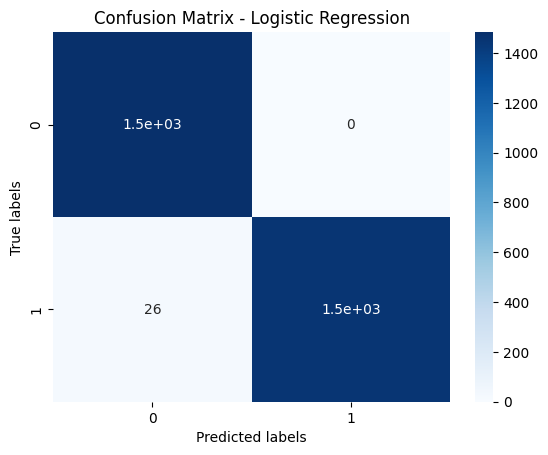

0.9912251096861289

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True, cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

accuracy_score(y_test,y_pred)

## **K-NN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5 ,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
#now let's predict the results for our test set
y_pred = classifier.predict(x_test)

#in order to have a preview we print both target columns (predicted and test) side by side (concatenated)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]


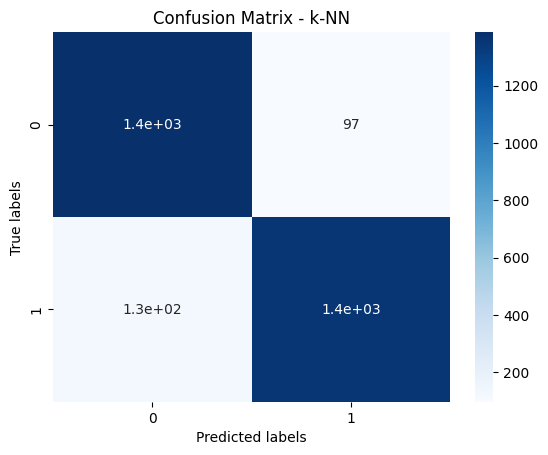

0.9247384407694904

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True, cmap='Blues')
plt.title('Confusion Matrix - k-NN')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

accuracy_score(y_test,y_pred)

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=42)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [ ]:
#now let's predict the results for our test set
y_pred = classifier.predict(x_test)

#in order to have a preview we print both target columns (predicted and test) side by side (concatenated)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]


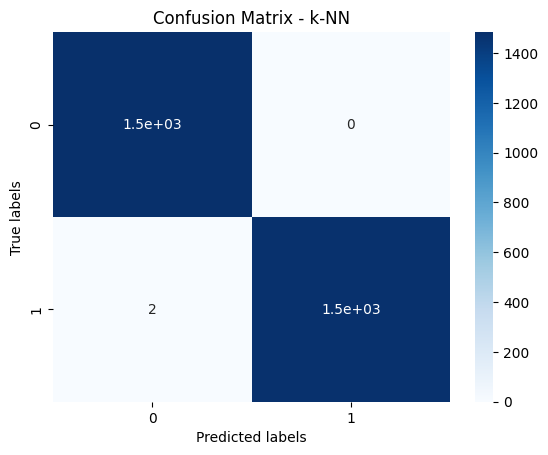

0.9993250084373946

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True, cmap='Blues')
plt.title('Confusion Matrix - k-NN')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

accuracy_score(y_test,y_pred)

## **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [ ]:
#now let's predict the results for our test set
y_pred = classifier.predict(x_test)

#in order to have a preview we print both target columns (predicted and test) side by side (concatenated)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 0]
 [1 1]
 ...
 [0 1]
 [0 0]
 [0 0]]


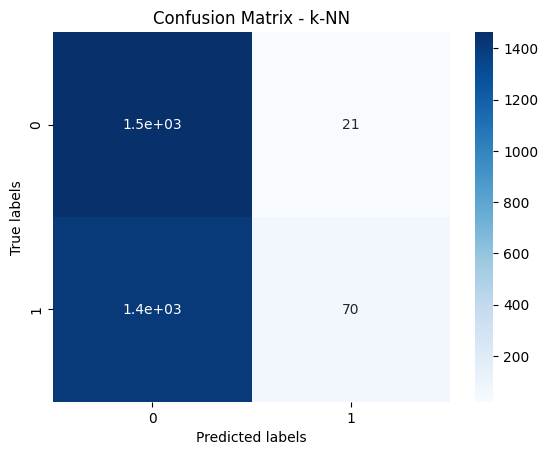

0.5173810327370908

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True, cmap='Blues')
plt.title('Confusion Matrix - k-NN')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

accuracy_score(y_test,y_pred)

## **SVM**

In [ ]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear',random_state=0)
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
#now let's predict the results for our test set
y_pred = classifier.predict(x_test)

#in order to have a preview we print both target columns (predicted and test) side by side (concatenated)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]


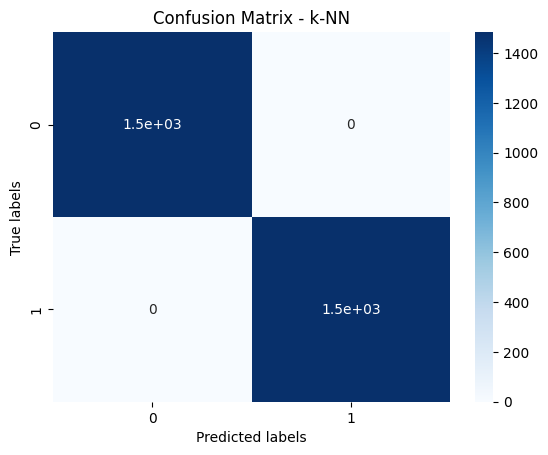

1.0

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True, cmap='Blues')
plt.title('Confusion Matrix - k-NN')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

accuracy_score(y_test,y_pred)